#### SUBJECT: DSC 530 DATA EXPLORATION AND ANALYSIS
#### NAME: ANBUSELVAN MAHALINGAM
#### FINAL PROJECT

Milestone 1: Evaluate Datasets and Formulate Statistical Questions

Data Selection


For this project, we focus on the S&P 500 and Dow Jones Industrial Average (Dow 30) indices. The dataset encompasses 5 years of historical data. Reference: Yahoofinance.com for obtainng these indices historical data.
    
S&P 500: https://finance.yahoo.com/quote/%5EGSPC/history?p=%255EGSPC

The Standard and Poor's 500, or simply the S&P 500,is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices and includes approximately 80% of the total market capitalization of U.S. public companies.
    
Dow 30: https://finance.yahoo.com/quote/%5EDJI/history?p=%255EDJI

The Dow Jones Industrial Average, Dow Jones, or simply the Dow, is a stock market index of 30 prominent companies listed on stock exchanges in the United States.     

In [52]:
# EDA - to explore and uderstad the initial data

#To load the data into dataframes and merge it together.

import pandas as pd

# To load the datasets
sp500_data_df = pd.read_csv('S&P500-5yearData.csv')
dow30_data_df = pd.read_csv('DOW30-5yearData.csv')

# To convert 'Date' columns to datetime
sp500_data_df['Date'] = pd.to_datetime(sp500_data_df['Date'])
dow30_data_df['Date'] = pd.to_datetime(dow30_data_df['Date'])

# Merge the datasets on 'Date' and rename fields with suffix.
merged_data = pd.merge(sp500_data_df, dow30_data_df, on='Date', suffixes=('_sp500', '_dow30'))
merged_data.head(n=5)

,Date,Open_sp500,High_sp500,Low_sp500,Close_sp500,Adj Close_sp500,Volume_sp500,Open_dow30,High_dow30,Low_dow30,Close_dow30,Adj Close_dow30,Volume_dow30
0,2019-01-22,2657.879883,2657.879883,2617.270020,2632.899902,2632.899902,3923950000,24607.759766,24607.759766,24244.310547,24404.480469,24404.480469,338480000
1,2019-01-23,2643.479980,2653.189941,2612.860107,2638.699951,2638.699951,3358770000,24577.250000,24700.980469,24307.169922,24575.619141,24575.619141,318600000
2,2019-01-24,2638.840088,2647.199951,2627.010010,2642.330078,2642.330078,3449230000,24579.960938,24626.300781,24422.730469,24553.240234,24553.240234,320170000
3,2019-01-25,2657.439941,2672.379883,2657.330078,2664.760010,2664.760010,3821000000,24687.210938,24860.150391,24676.750000,24737.199219,24737.199219,376890000
4,2019-01-28,2644.969971,2644.969971,2624.060059,2643.850098,2643.850098,3630820000,24596.980469,24596.980469,24323.939453,24528.220703,24528.220703,347170000


In [53]:
# to get overall info about the dataset icnluding the datatype and null value on the elements.
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1258 non-null   datetime64[ns]
 1   Open_sp500       1258 non-null   float64       
 2   High_sp500       1258 non-null   float64       
 3   Low_sp500        1258 non-null   float64       
 4   Close_sp500      1258 non-null   float64       
 5   Adj Close_sp500  1258 non-null   float64       
 6   Volume_sp500     1258 non-null   int64         
 7   Open_dow30       1258 non-null   float64       
 8   High_dow30       1258 non-null   float64       
 9   Low_dow30        1258 non-null   float64       
 10  Close_dow30      1258 non-null   float64       
 11  Adj Close_dow30  1258 non-null   float64       
 12  Volume_dow30     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 127.9 KB


In [54]:
merged_data.describe()

,Date,Open_sp500,High_sp500,Low_sp500,Close_sp500,Adj Close_sp500,Volume_sp500,Open_dow30,High_dow30,Low_dow30,Close_dow30,Adj Close_dow30,Volume_dow30
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2021-07-19 15:40:55.325914112,3777.426413,3800.220382,3753.356557,3778.343116,3778.343116,4.306184e+09,30994.985198,31177.771859,30803.684907,31000.664278,31000.664278,3.433044e+08
min,2019-01-22 00:00:00,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09,19028.359375,19121.009766,18213.650391,18591.929688,18591.929688,8.615000e+07
25%,2020-04-21 06:00:00,3152.619995,3182.530029,3137.015014,3154.027405,3154.027405,3.662092e+09,27248.515625,27375.132812,27147.099610,27276.270508,27276.270508,2.793375e+08
50%,2021-07-20 12:00:00,3917.295044,3949.779908,3891.505005,3918.785034,3918.785034,4.048580e+09,32176.530274,32486.354493,31897.425782,32197.125000,32197.125000,3.225800e+08
75%,2022-10-17 18:00:00,4329.079956,4361.334961,4291.397705,4328.559814,4328.559814,4.687198e+09,34192.227539,34410.108399,33981.481446,34206.047852,34206.047852,3.819850e+08
max,2024-01-19 00:00:00,4804.509766,4842.069824,4785.870117,4839.810059,4839.810059,9.976520e+09,37818.050781,37933.730469,37650.980469,37863.800781,37863.800781,9.159900e+08
std,NaN,630.107259,631.949095,628.910413,630.461755,630.461755,1.064672e+09,3871.336152,3863.303453,3885.919279,3875.314886,3875.314886,1.049822e+08


Count: 1258 entries

Variables:  Open_sp500,	High_sp500,	Low_sp500,	Close_sp500, Adj Close_sp500, Volume_sp500,	Open_dow30,	High_dow30,	Low_dow30,	Close_dow30, Adj Close_dow30, Volume_dow30.

S&P 500 the average closing price is around 3778, and the the mean volume is approximately 4.31 billion, reflecting the average trading activity.

Dow 30 the average closing price is approximately 31000,and the mean volume is around 343 million, suggesting lower trading volumes compared to the S&P 500.

In [55]:
# Also, get a summary of each dataset to understand the variables and data types

# Display the first few rows of each dataset to understand their structure
dow_30_data_head = dow30_data_df.head()
sp_500_data_head = sp500_data_df.head()


dow_30_data_head, sp_500_data_head

(        Date          Open          High           Low         Close  \
 0 2019-01-22  24607.759766  24607.759766  24244.310547  24404.480469   
 1 2019-01-23  24577.250000  24700.980469  24307.169922  24575.619141   
 2 2019-01-24  24579.960938  24626.300781  24422.730469  24553.240234   
 3 2019-01-25  24687.210938  24860.150391  24676.750000  24737.199219   
 4 2019-01-28  24596.980469  24596.980469  24323.939453  24528.220703   
 
       Adj Close     Volume  
 0  24404.480469  338480000  
 1  24575.619141  318600000  
 2  24553.240234  320170000  
 3  24737.199219  376890000  
 4  24528.220703  347170000  ,
         Date         Open         High          Low        Close    Adj Close  \
 0 2019-01-22  2657.879883  2657.879883  2617.270020  2632.899902  2632.899902   
 1 2019-01-23  2643.479980  2653.189941  2612.860107  2638.699951  2638.699951   
 2 2019-01-24  2638.840088  2647.199951  2627.010010  2642.330078  2642.330078   
 3 2019-01-25  2657.439941  2672.379883  2657.33007

In [56]:
dow_30_summary = dow30_data_df.describe(include='all')
sp_500_summary = sp500_data_df.describe(include='all')

dow_30_summary, sp_500_summary

(                                Date          Open          High  \
 count                           1258   1258.000000   1258.000000   
 mean   2021-07-19 15:40:55.325914112  30994.985198  31177.771859   
 min              2019-01-22 00:00:00  19028.359375  19121.009766   
 25%              2020-04-21 06:00:00  27248.515625  27375.132812   
 50%              2021-07-20 12:00:00  32176.530274  32486.354493   
 75%              2022-10-17 18:00:00  34192.227539  34410.108399   
 max              2024-01-19 00:00:00  37818.050781  37933.730469   
 std                              NaN   3871.336152   3863.303453   
 
                 Low         Close     Adj Close        Volume  
 count   1258.000000   1258.000000   1258.000000  1.258000e+03  
 mean   30803.684907  31000.664278  31000.664278  3.433044e+08  
 min    18213.650391  18591.929688  18591.929688  8.615000e+07  
 25%    27147.099610  27276.270508  27276.270508  2.793375e+08  
 50%    31897.425782  32197.125000  32197.125000  3.

Statistical Questions:

        How do the returns of the Dow 30 compare to the S&P 500 over the 5-year period? Calculate and compare the annualized returns of the Dow 30 and S&P 500 over the 5-year period to see which index offered better performance. 
        
        How do the trends in the moving averages (e.g., 50-day and 200-day moving averages) of the Dow 30 compare with those of the S&P 500 over the same period?
        
        What is the market volatility comparison between the Dow 30 and S&P 500? based on investors risk taking and apted violatility investor can choose best suited one for them.
        
        do we have any significant correlations between the movements of the Dow 30 and S&P 500 indexes? Is there a strong correlation between the closing prices of the Dow 30 and S&P 500? How does this correlation change when considering their moving averages?
        

/=============================================================================================================/

Milestone 2: Select a dataset, solidify your statistical question, begin describing the single variables in your dataset to determine which variables are relevant to your question (Distributions, PMFs, CDFs).  

/=============================================================================================================/

In [57]:
# Calculate the 50-day and 200-day moving averages for both datasets
dow30_data_df['50_day_MA'] = dow30_data_df['Close'].rolling(window=50).mean()
dow30_data_df['200_day_MA'] = dow30_data_df['Close'].rolling(window=200).mean()

sp500_data_df['50_day_MA'] = sp500_data_df['Close'].rolling(window=50).mean()
sp500_data_df['200_day_MA'] = sp500_data_df['Close'].rolling(window=200).mean()

# Display the head of each dataset to confirm the calculation
dow30_ma_head = dow30_data_df[['Date', 'Close', '50_day_MA', '200_day_MA']].head(210)  # Showing 210 to see the first 200-day MA
sp500_ma_head = sp500_data_df[['Date', 'Close', '50_day_MA', '200_day_MA']].head(210)

dow30_ma_head.tail(), sp500_ma_head.tail()


(          Date         Close     50_day_MA    200_day_MA
 205 2019-11-12  27691.490234  26947.325781  26317.157539
 206 2019-11-13  27783.589844  26975.888164  26331.001191
 207 2019-11-14  27781.960938  26996.964375  26344.912647
 208 2019-11-15  28004.890625  27021.112969  26359.617647
 209 2019-11-18  28036.220703  27045.127188  26373.601904,
           Date        Close    50_day_MA   200_day_MA
 205 2019-11-12  3091.840088  2997.541397  2903.198143
 206 2019-11-13  3094.040039  3000.666597  2905.263093
 207 2019-11-14  3096.629883  3003.079194  2907.225742
 208 2019-11-15  3120.459961  3005.914194  2909.295392
 209 2019-11-18  3122.030029  3008.786196  2911.281191)

    dow30_ma_head - dow30 50 day and 200 day moving average for the closing price.

    sp500_ma_head - S&P 500 50 day and 200 day moving average for the closing price.

        The 50-day moving average can be used to gauge the medium-term trend and 
        The 200-day moving average used to determine the long-term market trend. 

In [58]:
dow30_ma_head.describe()

,Date,Close,50_day_MA,200_day_MA
count,210,210.000000,161.000000,11.000000
mean,2019-06-20 23:32:34.285714176,26297.223289,26308.672749,26300.590377
min,2019-01-22 00:00:00,24404.480469,25530.217109,26225.430078
25%,2019-04-05 18:00:00,25809.885742,26041.282149,26263.259439
50%,2019-06-20 12:00:00,26324.404297,26367.525313,26301.599893
75%,2019-09-04 18:00:00,26832.372070,26587.640352,26337.956919
max,2019-11-18 00:00:00,28036.220703,27045.127188,26373.601904
std,NaN,738.923972,335.010307,49.318769



Mean: The average value. For the closing price, the average is 26,297.22, indicating that, on average, the closing price over the period was around this value. The 50-day MA has a slightly higher average of 26,308.67, and the 200-day MA's average is 26,300.59, showing consistency in the data's long-term trend.

Std (Standard Deviation): Measures the dispersion or variability of the dataset. The closing price has a standard deviation of 738.92, the 50-day MA has a standard deviation of 335.01, and the 200-day MA has a standard deviation of 49.32. This indicates that the closing prices fluctuated more widely than the moving averages

Min: The minimum value in the dataset. The minimum closing price is 24,404.48, the minimum 50-day MA is 25,530.22, and the minimum 200-day MA is 26,225.43.

25% (First Quartile): 25% of the data falls below this value. For the closing price, this is 25,809.89, for the 50-day MA it's 26,041.28, and for the 200-day MA, it's 26,263.26.

50% (Median): The middle value of the dataset. The median closing price is 26,324.40, the median 50-day MA is 26,367.53, and the median 200-day MA is 26,301.60.

75% (Third Quartile): 75% of the data falls below this value. For the closing price, this is 26,832.37, for the 50-day MA it's 26,587.64, and for the 200-day MA, it's 26,337.96.

Max: The maximum value in the dataset. The highest closing price is 28,036.22, the highest 50-day MA is 27,045.13, and the highest 200-day MA is 26,373.60.
    

In [59]:
sp500_ma_head.describe()

,Date,Close,50_day_MA,200_day_MA
count,210,210.000000,161.000000,11.000000
mean,2019-06-20 23:32:34.285714176,2899.692041,2905.141185,2900.819970
min,2019-01-22 00:00:00,2632.899902,2764.163994,2889.968292
25%,2019-04-05 18:00:00,2826.082520,2871.662388,2895.474418
50%,2019-06-20 12:00:00,2907.234986,2915.492603,2900.938943
75%,2019-09-04 18:00:00,2979.569886,2946.639595,2906.244418
max,2019-11-18 00:00:00,3122.030029,3008.786196,2911.281191
std,NaN,104.561864,54.279445,7.100526



Mean: The average value of the dataset. The mean closing price is approximately 2899.69, indicating the average level at which the index closed over the observed period. The 50-day MA has a slightly higher average of 2905.14, and the 200-day MA's average is around 2900.82, suggesting a relatively stable trend in the long term.

Std (Standard Deviation): Measures the spread or variability around the mean. The closing price's standard deviation is 104.56, indicating how much individual closing prices deviate from the average. The 50-day MA's standard deviation is 54.28, and the 200-day MA's is significantly lower at 7.10, reflecting the smoothing effect of moving averages on price volatility.

Min: The minimum value observed in the dataset. The minimum closing price is 2632.90, significantly lower than the average.The minimum values for the 50-day and 200-day MAs are 2764.16 and 2889.97, respectively.

25% (First Quartile): This value indicates that 25% of the observations fall below this point. For the closing price, it's 2826.08, for the 50-day MA it's 2871.66, and for the 200-day MA, it's 2895.47, suggesting a lower quartile range where prices were relatively lower.

50% (Median): The median value splits the dataset in half. The median closing price is 2907.23, very close to the average.The median values for the 50-day and 200-day MAs are 2915.49 and 2900.94, respectively, further indicating consistent trend direction.

75% (Third Quartile): 75% of the data falls below this value. For the closing price, this is 2979.57, for the 50-day MA it's 2946.64, and for the 200-day MA, it's 2906.24.

Max: The maximum values observed. The highest closing price is 3122.03, and the highest values for the 50-day and 200-day MAs are 3008.79 and 2911.28, respectively. 

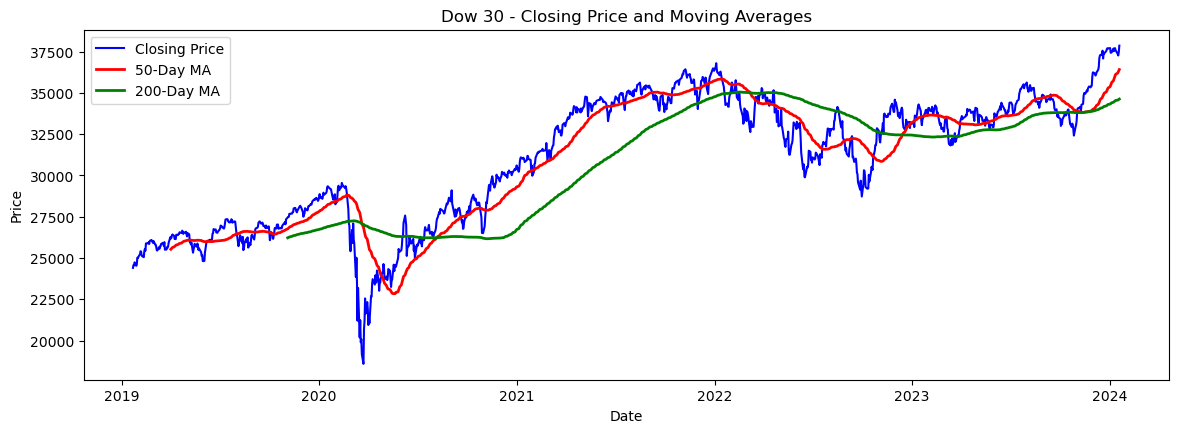

In [60]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(14, 10))

# Plot for Dow 30
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(dow30_data_df['Date'], dow30_data_df['Close'], label='Closing Price', color='blue')
plt.plot(dow30_data_df['Date'], dow30_data_df['50_day_MA'], label='50-Day MA', color='red', linewidth=2)
plt.plot(dow30_data_df['Date'], dow30_data_df['200_day_MA'], label='200-Day MA', color='green', linewidth=2)
plt.title('Dow 30 - Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


Dow 30 - Closing Price and Moving Averages - Plot

Volatility: The blue line shows periods of significant volatility, particularly around the 2020 mark this is experienced during the COVID-19 pandemic.

Trend Analysis: Both the 50-day and 200-day moving averages show that despite short-term fluctuations, the overall long-term trend appears to be upward.

Crossovers: There are points where the moving averages cross over the closing price line. These crossovers are often watched by traders as they are considered as buy/bullish signal . when the 50-day MA (red line) crosses above the 200-day MA (green line), it is often considered a bullish signal, while a cross in the opposite direction can be a bearish signal.

Recent Trends: Towards the right end of the chart, there is an uptick in the closing price and the 50-day MA, which suggests a recent bullish trend, meaning the market is moving up.



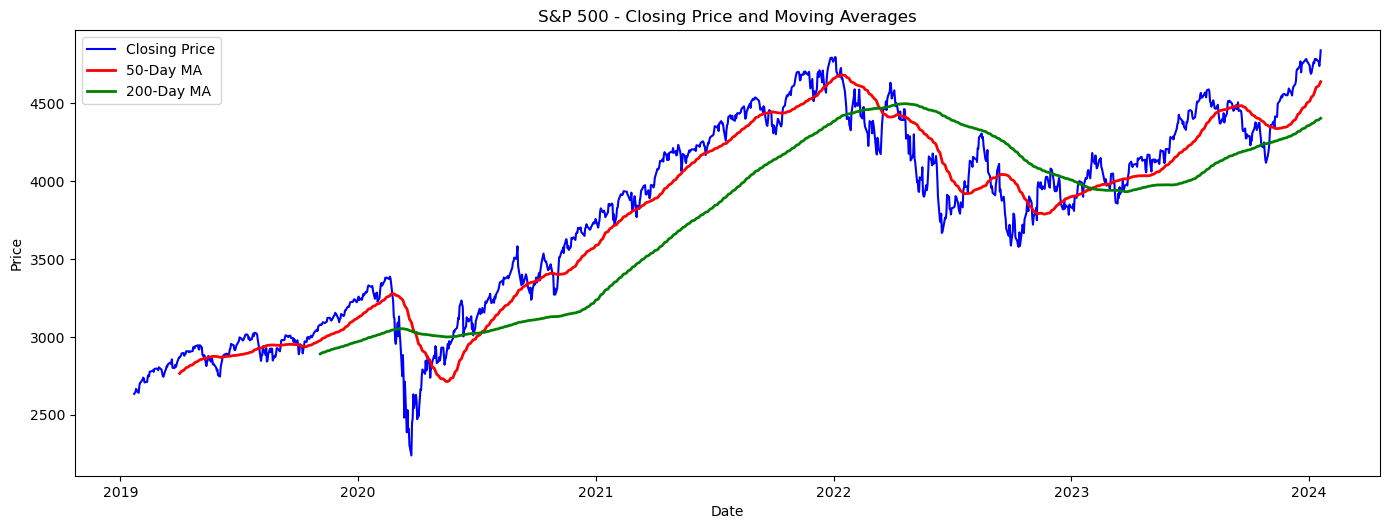

In [61]:
# Plot for S&P 500

# Set the plot size
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(sp500_data_df['Date'], sp500_data_df['Close'], label='Closing Price', color='blue')
plt.plot(sp500_data_df['Date'], sp500_data_df['50_day_MA'], label='50-Day MA', color='red', linewidth=2)
plt.plot(sp500_data_df['Date'], sp500_data_df['200_day_MA'], label='200-Day MA', color='green', linewidth=2)
plt.title('S&P 500 - Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

S&P 500 - Closing Price and Moving Averages

Volatility: The closing price line shows more volatility compared to the moving averages
    
Trend Analysis: Both the 50-day and 200-day moving averages show that despite short-term fluctuations, the overall long-term trend appears to be upward.

Crossovers: There are points where the moving averages cross over the closing price line. These crossovers are often watched by traders as they are considered as buy/bullish signal, when the 50-day MA (red line) crosses above the 200-day MA (green line), it is often considered a bullish signal, while a cross in the opposite direction can be a bearish signal. 

Recent Trends: Towards the right end of the chart, there is an uptick in the closing price and the 50-day MA, which suggests a recent bullish trend, meaning the market is moving up.

In [62]:
# Merge the datasets on 'Date' and rename fields with suffix.
merged_index_data = pd.merge(sp500_data_df, dow30_data_df, on='Date', suffixes=('_sp500', '_dow30'))
merged_index_data.head(n=5)

,Date,Open_sp500,High_sp500,Low_sp500,Close_sp500,Adj Close_sp500,Volume_sp500,50_day_MA_sp500,200_day_MA_sp500,Open_dow30,High_dow30,Low_dow30,Close_dow30,Adj Close_dow30,Volume_dow30,50_day_MA_dow30,200_day_MA_dow30
0,2019-01-22,2657.879883,2657.879883,2617.270020,2632.899902,2632.899902,3923950000,NaN,NaN,24607.759766,24607.759766,24244.310547,24404.480469,24404.480469,338480000,NaN,NaN
1,2019-01-23,2643.479980,2653.189941,2612.860107,2638.699951,2638.699951,3358770000,NaN,NaN,24577.250000,24700.980469,24307.169922,24575.619141,24575.619141,318600000,NaN,NaN
2,2019-01-24,2638.840088,2647.199951,2627.010010,2642.330078,2642.330078,3449230000,NaN,NaN,24579.960938,24626.300781,24422.730469,24553.240234,24553.240234,320170000,NaN,NaN
3,2019-01-25,2657.439941,2672.379883,2657.330078,2664.760010,2664.760010,3821000000,NaN,NaN,24687.210938,24860.150391,24676.750000,24737.199219,24737.199219,376890000,NaN,NaN
4,2019-01-28,2644.969971,2644.969971,2624.060059,2643.850098,2643.850098,3630820000,NaN,NaN,24596.980469,24596.980469,24323.939453,24528.220703,24528.220703,347170000,NaN,NaN


In [63]:
# Extracted new feature for the Moving averages and the datasets are merged as part of EDA task.
merged_index_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1258 non-null   datetime64[ns]
 1   Open_sp500        1258 non-null   float64       
 2   High_sp500        1258 non-null   float64       
 3   Low_sp500         1258 non-null   float64       
 4   Close_sp500       1258 non-null   float64       
 5   Adj Close_sp500   1258 non-null   float64       
 6   Volume_sp500      1258 non-null   int64         
 7   50_day_MA_sp500   1209 non-null   float64       
 8   200_day_MA_sp500  1059 non-null   float64       
 9   Open_dow30        1258 non-null   float64       
 10  High_dow30        1258 non-null   float64       
 11  Low_dow30         1258 non-null   float64       
 12  Close_dow30       1258 non-null   float64       
 13  Adj Close_dow30   1258 non-null   float64       
 14  Volume_dow30      1258 n

In [64]:
# To Calculating Daily Returns of each index

merged_index_data['Daily_Returns_sp500'] = merged_index_data['Close_sp500'].pct_change()
merged_index_data['Daily_Returns_dow30'] = merged_index_data['Close_dow30'].pct_change()


In [65]:
merged_index_data.describe()

,Date,Open_sp500,High_sp500,Low_sp500,Close_sp500,Adj Close_sp500,Volume_sp500,50_day_MA_sp500,200_day_MA_sp500,Open_dow30,High_dow30,Low_dow30,Close_dow30,Adj Close_dow30,Volume_dow30,50_day_MA_dow30,200_day_MA_dow30,Daily_Returns_sp500,Daily_Returns_dow30
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1209.000000,1059.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1209.000000,1059.000000,1257.000000,1257.000000
mean,2021-07-19 15:40:55.325914112,3777.426413,3800.220382,3753.356557,3778.343116,3778.343116,4.306184e+09,3780.704635,3799.383276,30994.985198,31177.771859,30803.684907,31000.664278,31000.664278,3.433044e+08,30992.339929,31085.136966,0.000574,0.000436
min,2019-01-22 00:00:00,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,1.296530e+09,2712.516582,2889.968292,19028.359375,19121.009766,18213.650391,18591.929688,18591.929688,8.615000e+07,22835.646914,26165.929707,-0.119841,-0.129265
25%,2020-04-21 06:00:00,3152.619995,3182.530029,3137.015014,3154.027405,3154.027405,3.662092e+09,3177.199214,3146.031073,27248.515625,27375.132812,27147.099610,27276.270508,27276.270508,2.793375e+08,27373.975234,27037.240244,-0.005052,-0.004635
50%,2021-07-20 12:00:00,3917.295044,3949.779908,3891.505005,3918.785034,3918.785034,4.048580e+09,3944.557627,3974.943213,32176.530274,32486.354493,31897.425782,32197.125000,32197.125000,3.225800e+08,32122.510195,32458.909336,0.000866,0.000661
75%,2022-10-17 18:00:00,4329.079956,4361.334961,4291.397705,4328.559814,4328.559814,4.687198e+09,4340.360596,4248.866646,34192.227539,34410.108399,33981.481446,34206.047852,34206.047852,3.819850e+08,34181.649609,33812.635166,0.007145,0.006098
max,2024-01-19 00:00:00,4804.509766,4842.069824,4785.870117,4839.810059,4839.810059,9.976520e+09,4681.011611,4496.905588,37818.050781,37933.730469,37650.980469,37863.800781,37863.800781,9.159900e+08,36414.041016,35052.315000,0.093828,0.113650
std,NaN,630.107259,631.949095,628.910413,630.461755,630.461755,1.064672e+09,598.646195,532.897575,3871.336152,3863.303453,3885.919279,3875.314886,3875.314886,1.049822e+08,3640.432276,3270.561963,0.013376,0.013107


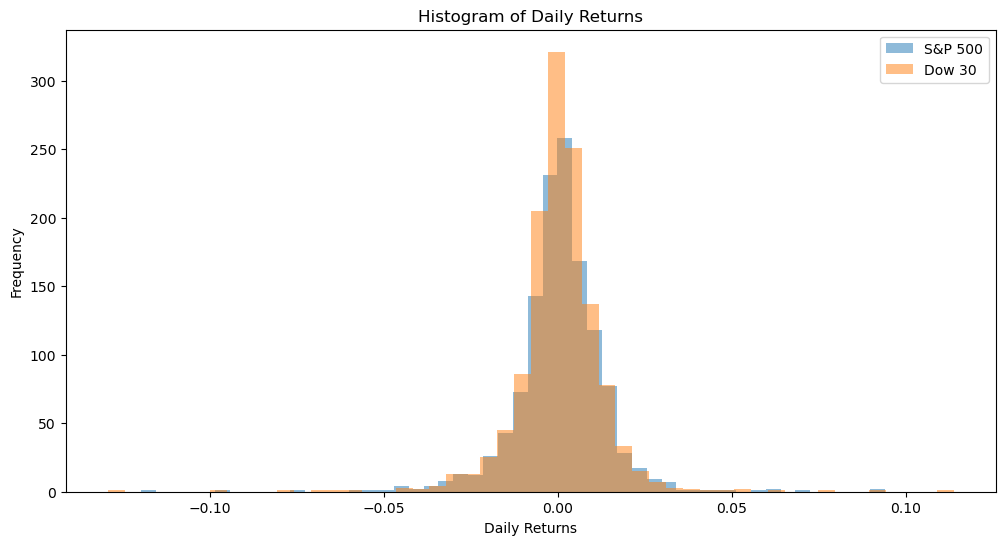

In [66]:
#Plotting Histograms for Daily Returns

plt.figure(figsize=(12, 6))
plt.hist(merged_index_data['Daily_Returns_sp500'].dropna(), bins=50, alpha=0.5, label='S&P 500')
plt.hist(merged_index_data['Daily_Returns_dow30'].dropna(), bins=50, alpha=0.5, label='Dow 30')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Returns')
plt.legend()
plt.show()


Summary:

    Central Tendency: Both distributions appear to be centered around a return of 0, indicating that there's no persistent trend of gains or losses over the days included in the dataset.

    Volatility: The spread of the distributions gives us a visual cue about volatility.it looks like the distributions have similar spreads, suggesting comparable levels of volatility.

    Outliers and Extreme Values: The tails of the distributions indicate the occurrence of extreme returns. A longer tail on one side might show that the index had days with significant gains or losses.

    Overlap: There is considerable overlap between the two histograms, This overlap suggests that the indexes often moved in the same direction on a given day.

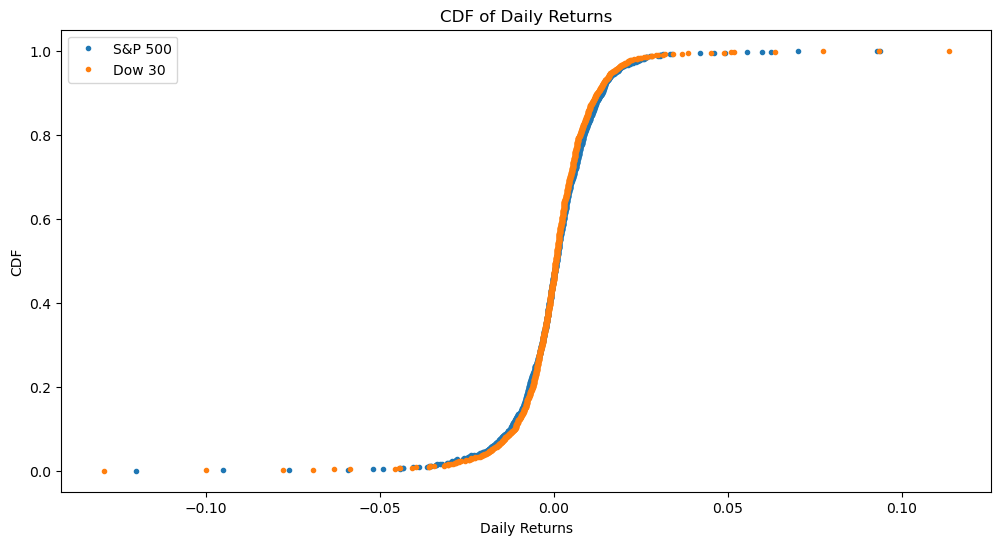

In [67]:
# Plotting CDFs for Daily Returns

import numpy as np

# Prepare data for CDF plot
x_sp500 = np.sort(merged_index_data['Daily_Returns_sp500'].dropna())
y_sp500 = np.arange(1, len(x_sp500)+1) / len(x_sp500)

x_dow30 = np.sort(merged_index_data['Daily_Returns_dow30'].dropna())
y_dow30 = np.arange(1, len(x_dow30)+1) / len(x_dow30)

# Plot CDFs
plt.figure(figsize=(12, 6))
plt.plot(x_sp500, y_sp500, label='S&P 500', marker='.', linestyle='none')
plt.plot(x_dow30, y_dow30, label='Dow 30', marker='.', linestyle='none')
plt.xlabel('Daily Returns')
plt.ylabel('CDF')
plt.title('CDF of Daily Returns')
plt.legend()
plt.show()


Summary:

    The CDFs of both indexes closely follow each other, this again confirms the strong correlation between their daily returns. This suggests that the returns of the two indexes exhibit very similar behavior.
    
    From the plot it is evident that DOW 30 index has higher risk and higher rate of daily returns than S&P 3 500, the left extreme negative and ight extreme positive points in the plot expreses the details.

In [68]:
#MileStone -3

# Correlation Analysis

# Calculate the correlation coefficients
closing_prices_corr = merged_index_data['Close_dow30'].corr(merged_index_data['Close_sp500'])
ma_50_day_corr = merged_index_data['50_day_MA_dow30'].corr(merged_index_data['50_day_MA_sp500'])
ma_200_day_corr = merged_index_data['200_day_MA_dow30'].corr(merged_index_data['200_day_MA_sp500'])
daily_return = merged_index_data['Daily_Returns_dow30'].corr(merged_index_data['Daily_Returns_sp500'])

closing_prices_corr, ma_50_day_corr, ma_200_day_corr, daily_return


(0.9790794685126513, 0.9816235205023314, 0.990136066678491, 0.9580645698235316)

Summary:

    The correlation analysis reveals strong positive correlations between the Dow 30 and S&P 500 indexes.
    
    The correlation coefficient for the closing prices is 0.979, indicating a very strong positive relationship. This suggests that the movements in the closing prices of the Dow 30 and S&P 500 are highly synchronized.
    
    The correlation coefficient for the 50-day moving averages is 0.982, also indicating a very strong positive relationship. This suggests that the short-term trends of the two indexes are very similar.
    
    The correlation coefficient for the 200-day moving averages is 0.990, showing an even stronger positive relationship. This indicates that the long-term trends of the Dow 30 and S&P 500 are extremely closely aligned.
    
    The correlation coefficient for the daily return is 0.958, showing an even stronger positive relationship. his suggests that the returns of the two indexes exhibit very similar behavior.

Selected variables 


    Close_dow30 - Closing price of dow 30 index
    Close_sp500 - Closing price of s&p 500 index
    50_day_MA_dow30 - 50 day moving average price of dow 30 index
    50_day_MA_sp500 - 50 day moving average price of s&p 30 index
    200_day_MA_dow30 - 200 day moving average price of dow 30 index
    200_day_MA_sp500 - 200 day moving average price of s&p 30 index
    Daily_Returns_dow30 - daily return of dow 30 index
    Daily_Returns_sp500 - daily return of s&p 500 index
    
    

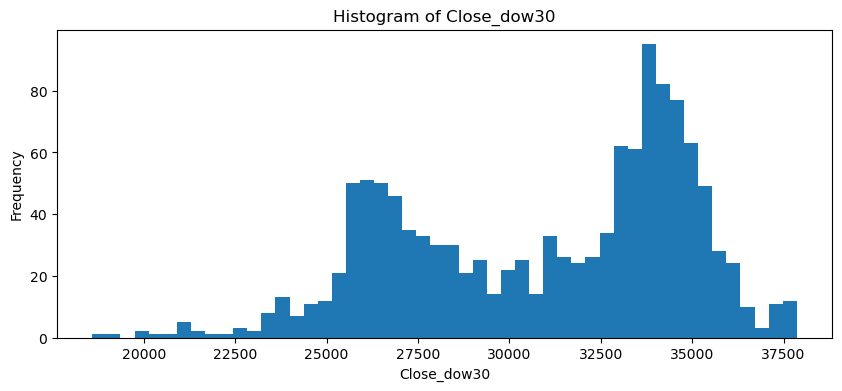

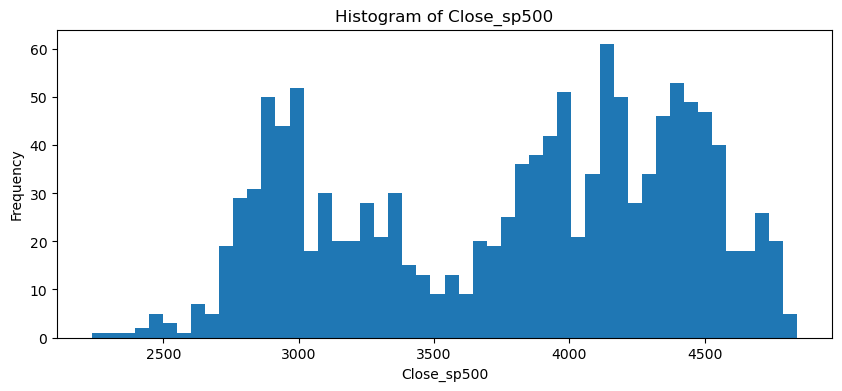

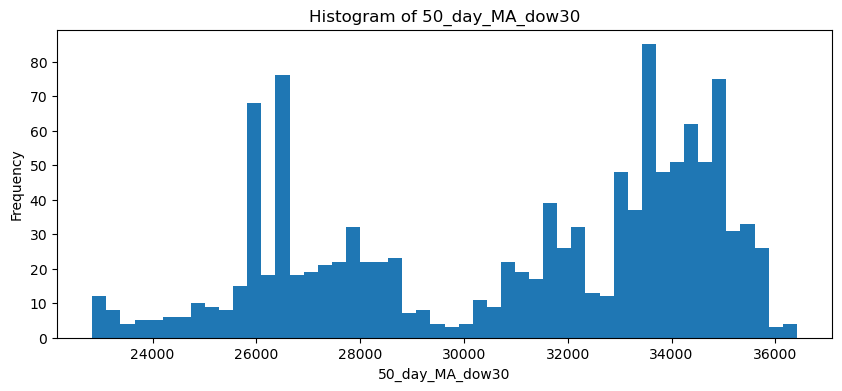

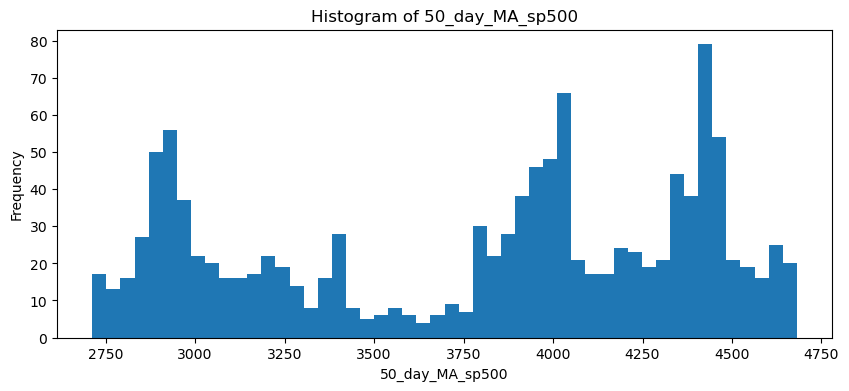

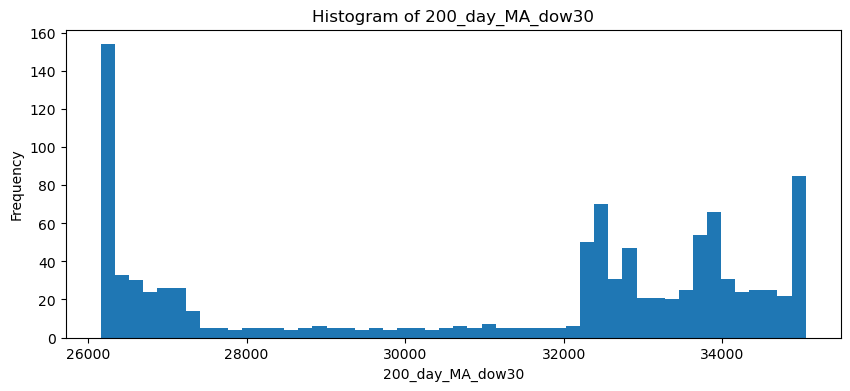

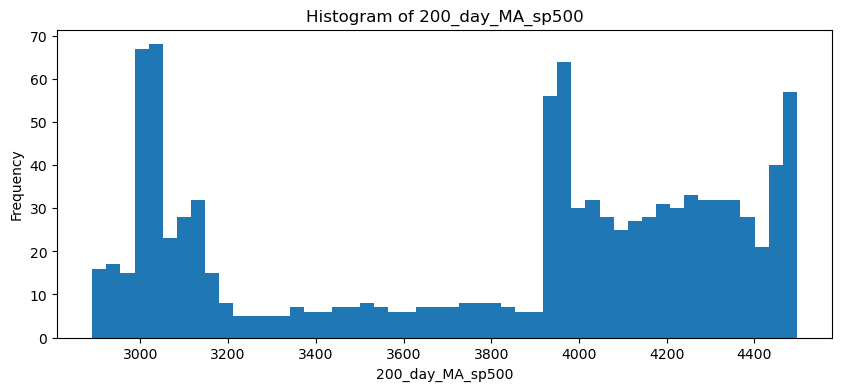

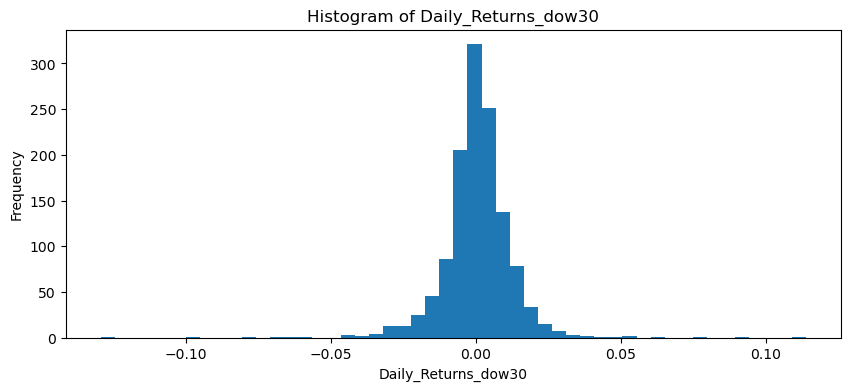

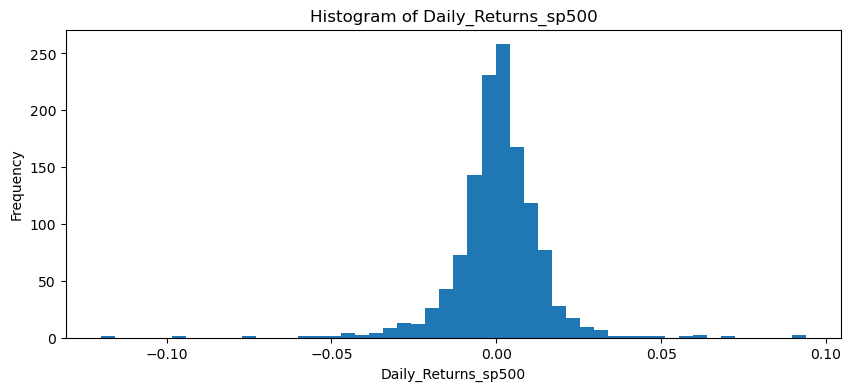

In [69]:
# Histograms
for column in ['Close_dow30', 'Close_sp500', '50_day_MA_dow30', '50_day_MA_sp500', 
               '200_day_MA_dow30', '200_day_MA_sp500', 'Daily_Returns_dow30', 'Daily_Returns_sp500']:
    plt.figure(figsize=(10, 4))
    plt.hist(merged_index_data[column].dropna(), bins=50)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()




Close_dow30 histogram : The data spans a range from around 20,000 to over 35,000, indicating a wide spread in closing prices over the 5-year period.There seems to be fewer instances of extremely low or high closing prices those looks to be ourliers but in real scenaio those are market violatility.

Close_sp500 histogram: The S&P 500 closing prices range from approximately 2500 to above 4500, showing a significant spread and suggesting that the index experienced substantial growth and/or fluctuations during the 5-year period.There seems to be fewer instances of extremely low or high closing prices those looks to be ourliers but in real scenaio those are market violatility.

50_day_MA_dow30 histogram: The values range from around 24,000 to 36,000, displaying a broad range which reflects the movement of the Dow 30 over time.The presence of bars at the extremes suggests that there are tails in the distribution, indicating periods where the moving average was significantly higher or lower than the norm.

50_day_MA_sp500 histogram:The spread is from approximately 2750 to 4750, which is a substantial range, demonstrating that the S&P 500 also had significant movement in its 50-day moving average over time.The tails suggest that the 50-day moving average occasionally fell into these extreme high or low ranges.

200_day_MA_dow30 histogram: The range of the 200-day MA for the Dow 30 is broad, extending from around 26,000 to 34,000, which indicates significant movement over the 5-year period.The right tail show fewer occurrences of extremely high 200-day moving averages.

200_day_MA_sp500 histogram: The distribution ranges from around 3000 to 4400, which is a wide spread, reflecting the movement in the S&P 500 over time.Like the Dow 30, the right tail has peaks that could indicate periods of growth or recovery in the market.

Daily_Returns_dow30 histogram: The distribution covers a range of returns from approximately -0.10 to 0.10. This spread provides insight into the typical daily movement of the Dow 30 index.the tail represent the less frequent occurrence of very high or very low returns.

Daily_Returns_sp500 histogram: The range is also similar to the Dow 30's, with returns extending from -0.10 to 0.10.The tails of this distribution are also indicative of the infrequent extreme returns that can occur in the market.
  
    

In [70]:
# Detecting outliers using IQR
for column in ['Close_dow30', 'Close_sp500', '50_day_MA_dow30', '50_day_MA_sp500', 
               '200_day_MA_dow30', '200_day_MA_sp500', 'Daily_Returns_dow30', 'Daily_Returns_sp500']:
    Q1 = merged_index_data[column].quantile(0.25)
    Q3 = merged_index_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = merged_index_data[(merged_index_data[column] < (Q1 - 1.5 * IQR)) | (merged_index_data[column] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in {column}:\n", outliers[column])

Outliers in Close_dow30:
 Series([], Name: Close_dow30, dtype: float64)
Outliers in Close_sp500:
 Series([], Name: Close_sp500, dtype: float64)
Outliers in 50_day_MA_dow30:
 Series([], Name: 50_day_MA_dow30, dtype: float64)
Outliers in 50_day_MA_sp500:
 Series([], Name: 50_day_MA_sp500, dtype: float64)
Outliers in 200_day_MA_dow30:
 Series([], Name: 200_day_MA_dow30, dtype: float64)
Outliers in 200_day_MA_sp500:
 Series([], Name: 200_day_MA_sp500, dtype: float64)
Outliers in Daily_Returns_dow30:
 77    -0.023798
135   -0.028970
142   -0.030460
149   -0.023744
259   -0.020909
         ...   
940    0.028341
946    0.024691
951    0.025864
960    0.036951
984   -0.022497
Name: Daily_Returns_dow30, Length: 73, dtype: float64
Outliers in Daily_Returns_sp500:
 77    -0.024131
135   -0.029778
142   -0.029293
149   -0.025946
274   -0.033514
         ...   
942    0.026480
954   -0.025002
960    0.055434
973    0.030948
984   -0.024922
Name: Daily_Returns_sp500, Length: 73, dtype: float64


SUMMARY ON OUTLIERS:

    Based on Interquartile Range technique, there is no significant Outliers in Close_dow30, Close_sp500, 50_day_MA_dow30, 50_day_MA_sp500,  200_day_MA_dow30, 200_day_MA_sp500, Daily_Returns_dow30.
    
    The daily returns, shows some outliers, they are the days with returns that significantly deviate from the norm, which might be attributed to specific market events, news, or economic data releases that caused unusual market volatility.   
       

In [71]:
import pandas as pd

# Calculate Descriptive Statistics
descriptive_stats = merged_index_data.describe(include='all')
modes = merged_index_data.mode().loc[0]

# Exclude non-numeric columns before calculating skewness and kurtosis
numeric_data = merged_index_data.select_dtypes(include=['number'])
# Calculate skewness and kurtosis on numeric columns only
skewness = numeric_data.skew()
kurtosis = numeric_data.kurt()

# Print Descriptive Statistics
print(descriptive_stats)
print("\nModes:\n", modes)


                                Date   Open_sp500   High_sp500    Low_sp500  \
count                           1258  1258.000000  1258.000000  1258.000000   
mean   2021-07-19 15:40:55.325914112  3777.426413  3800.220382  3753.356557   
min              2019-01-22 00:00:00  2290.709961  2300.729980  2191.860107   
25%              2020-04-21 06:00:00  3152.619995  3182.530029  3137.015014   
50%              2021-07-20 12:00:00  3917.295044  3949.779908  3891.505005   
75%              2022-10-17 18:00:00  4329.079956  4361.334961  4291.397705   
max              2024-01-19 00:00:00  4804.509766  4842.069824  4785.870117   
std                              NaN   630.107259   631.949095   628.910413   

       Close_sp500  Adj Close_sp500  Volume_sp500  50_day_MA_sp500  \
count  1258.000000      1258.000000  1.258000e+03      1209.000000   
mean   3778.343116      3778.343116  4.306184e+09      3780.704635   
min    2237.399902      2237.399902  1.296530e+09      2712.516582   
25%    3

In [72]:
print("\nSkewness:\n", skewness)


Skewness:
 Open_sp500            -0.295464
High_sp500            -0.298797
Low_sp500             -0.294806
Close_sp500           -0.295569
Adj Close_sp500       -0.295569
Volume_sp500           1.654863
50_day_MA_sp500       -0.321557
200_day_MA_sp500      -0.430177
Open_dow30            -0.442084
High_dow30            -0.427096
Low_dow30             -0.459065
Close_dow30           -0.439815
Adj Close_dow30       -0.439815
Volume_dow30           1.835382
50_day_MA_dow30       -0.449844
200_day_MA_dow30      -0.455002
Daily_Returns_sp500   -0.530018
Daily_Returns_dow30   -0.573093
dtype: float64


Summary based on the skewness values:

    Most of the variables have a negative skew, meaning their distributions are skewed to the left. This includes the Open, High, Low, Close, and Adjusted Close prices for both the S&P 500 and Dow 30, as well as their 50-day and 200-day moving averages.
    The Volume_sp500 and Volume_dow30 variables show a positive skew, indicating a long tail to the right of the distribution. as trading volume can spike significantly on certain days due to market events, leading to a distribution that is not symmetrical.
    The Daily_Returns_sp500 and Daily_Returns_dow30 variables also show a negative skew, suggesting that negative returns might be more pronounced than positive returns in their distributions.

In [73]:
print("\nKurtosis:\n", kurtosis)


Kurtosis:
 Open_sp500             -1.214726
High_sp500             -1.236992
Low_sp500              -1.185839
Close_sp500            -1.212984
Adj Close_sp500        -1.212984
Volume_sp500            4.106135
50_day_MA_sp500        -1.327806
200_day_MA_sp500       -1.357867
Open_dow30             -0.901846
High_dow30             -0.982955
Low_dow30              -0.800419
Close_dow30            -0.895149
Adj Close_dow30        -0.895149
Volume_dow30            5.358645
50_day_MA_dow30        -1.215240
200_day_MA_dow30       -1.467378
Daily_Returns_sp500    13.437395
Daily_Returns_dow30    20.229618
dtype: float64


Summary on Kurtosis:

    Negative kurtosis indicates a distribution with lighter tails than the normal distribution.The Open_sp500, High_sp500, Low_sp500, Close_sp500, Adj Close_sp500, 50_day_MA_sp500, 200_day_MA_sp500, Open_dow30, High_dow30, Low_dow30, Close_dow30, Adj Close_dow30, 50_day_MA_dow30, and 200_day_MA_dow30 variables exhibit negative kurtosis, suggesting that their distributions are relatively flat with lighter tails than a normal distribution. This indicates fewer outliers and less extreme values in these variables.
    
    Positive kurtosis indicates a distribution with heavier tails than the normal distribution, meaning it has more outliers.The Volume_sp500 and Volume_dow30 variables have positive kurtosis values,This suggests the presence of outliers or extreme values, which is common in trading volume data due to large fluctuations on specific days.
    
    Positive kurtosis indicates a distribution with heavier tails than the normal distribution, meaning it has more outliers. The Daily_Returns_sp500 and Daily_Returns_dow30 variables show very high positive kurtosis, indicating extremely heavy tails. This suggests a significant presence of outliers and a high risk of extreme values. 

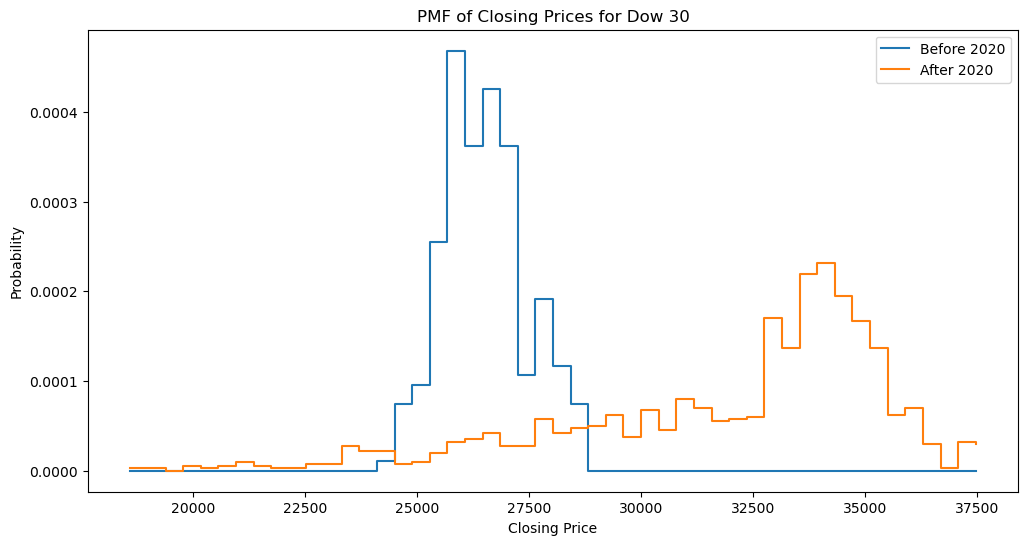

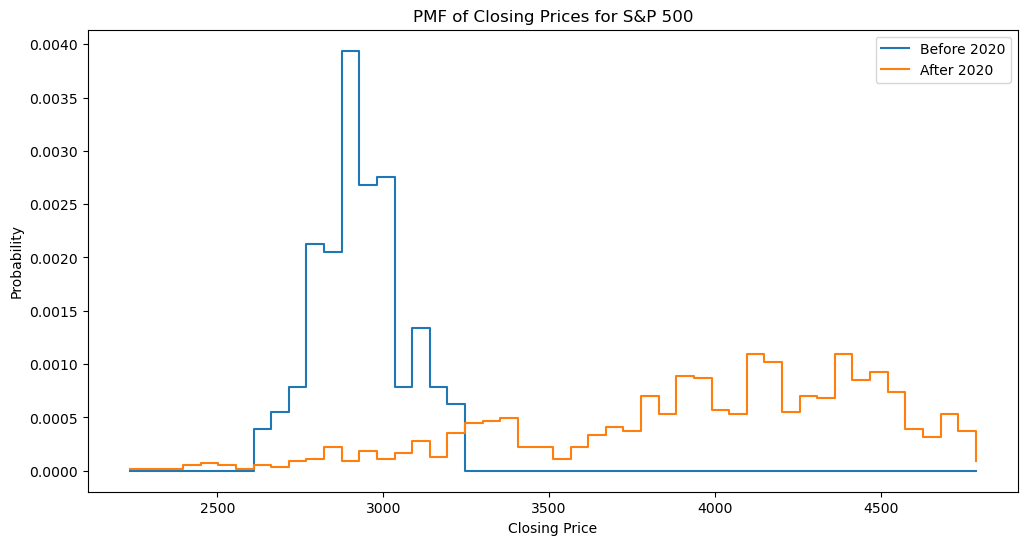

In [74]:
# To compare two scenarios in data using a PMF - closing price bfore and after 2020

# Function to discretize closing prices and plot PMFs
def plot_pmf_comparison(df, element, title):
    # Split data based on date
    before_2020 = df[df['Date'] < '2020-01-01'][element]
    after_2020 = df[df['Date'] >= '2020-01-01'][element]
    
    # Discretize into bins
    bins = np.linspace(min(df[element]), max(df[element]), 50)
    before_2020_hist, _ = np.histogram(before_2020, bins=bins, density=True)
    after_2020_hist, _ = np.histogram(after_2020, bins=bins, density=True)
    
    # Plot PMFs
    plt.figure(figsize=(12, 6))
    plt.plot(bins[:-1], before_2020_hist, label='Before 2020', drawstyle='steps-post')
    plt.plot(bins[:-1], after_2020_hist, label='After 2020', drawstyle='steps-post')
    plt.title(f'PMF of Closing Prices for {title}')
    plt.xlabel('Closing Price')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Plot PMF comparison for Dow 30
plot_pmf_comparison(merged_index_data, 'Close_dow30' , 'Dow 30')

# Plot PMF comparison for S&P 500
plot_pmf_comparison(merged_index_data, 'Close_sp500', 'S&P 500')


Summary:

        Here we can consider only the closign price, and compare Closing Prices Before and After 2020 Using PMFs. here the 2020 was choosen because of the century(2000)  and we had COVID situation around 2020. we can plot the distribution of closing price change before and after COVID situation (2020)
        
        The PMF gives a clear visual representation of how the distribution of closing prices has changed from one period to another.

       dow 30 - here there is a shift in the distribution of closing prices from before to after 2020. 
       
Before 2020, the PMF is concentrated at lower closing price values, particularly around the 20,000 to 25,000 range.
After 2020, the closing prices' PMF shifts to the right, indicating an increase in the closing prices of Dow 30, with a concentration around th 
30,000 to 35,000 range. This suggests that the closing prices were generally higher after 2020 compared to befo index price.r

       S&P 500 - here there is a shift in the distribution of closing prices for the S&P 500 after 2020, with the PMF concentrated at higher closing price values. 
       
Before 2020, the PMF peaks around the 2500 to 3000 range, which indicates that most of the closing prices were within this range 
After 2020, the distribution becomes flatter with a wider spread of closing prices, and the concentration seems to be more towards the 3500 to 4000 rang.
The tail of the distribution for the period after 2020 extends to higher closing prices, which were less frequent before 2020. This indicates the occurrence of higher closing prices more regularly after 2020.  e.

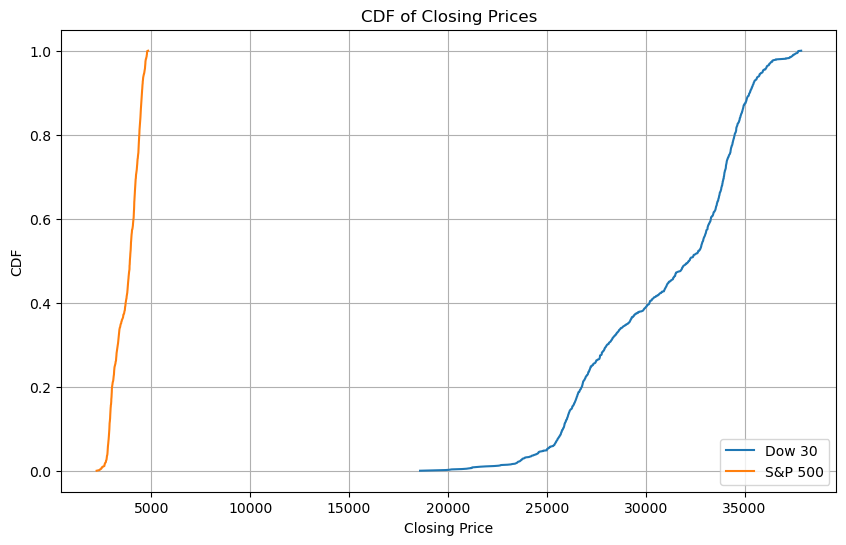

In [75]:
# Create 1 CDF with one of your variables, what does this tell you about your variable and how does it address the question you are trying to answer

# Sort the closing prices
sorted_close_dow30 = np.sort(merged_index_data['Close_dow30'])
sorted_close_sp500 = np.sort(merged_index_data['Close_sp500'])

# Calculate the CDF for each index
cdf_dow30 = np.arange(1, len(sorted_close_dow30)+1) / len(sorted_close_dow30)
cdf_sp500 = np.arange(1, len(sorted_close_sp500)+1) / len(sorted_close_sp500)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(sorted_close_dow30, cdf_dow30, label='Dow 30')
plt.plot(sorted_close_sp500, cdf_sp500, label='S&P 500')
plt.title('CDF of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

Summary:

        The CDF plot for the closing prices of the Dow 30 and S&P 500 provides a visual comparison of the price distributions for both indices. 

        The S&P 500's CDF curve appears to start rising at a lower closing price and continues to a higher closing price compared to the Dow 30's CDF.The S&P 500's curve shows a more gradual slope, indicating a more even distribution of closing prices, while the Dow 30's curve is steeper, indicating more concentration in a narrower range of closing prices.The S&P 500 index exhibits a more gradual slope compared to the Dow 30, which has a steeper curve. we can infer that the S&P 500 index has greater volatility than the Dow 30.



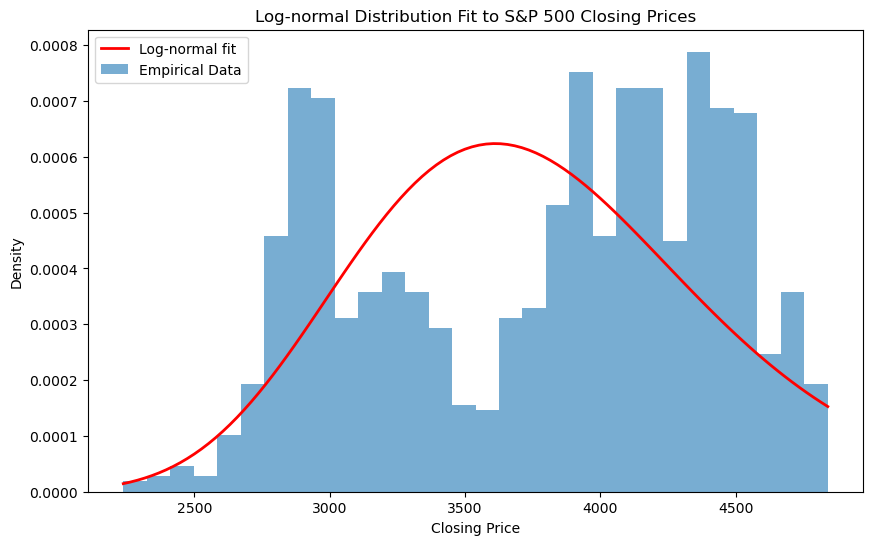

In [76]:
# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen

# log-normal distribution for S&P 500 closing price.

from scipy.stats import lognorm

data = merged_index_data['Close_sp500']

# Fit the log-normal distribution
log_data = np.log(data)
shape, loc, scale = lognorm.fit(data, floc=0) 

# Create the analytical distribution
x = np.linspace(min(data), max(data), 100)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

# Plot the analytical distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
plt.hist(data, bins=30, density=True, alpha=0.6, label='Empirical Data')
plt.title('Log-normal Distribution Fit to S&P 500 Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.show()

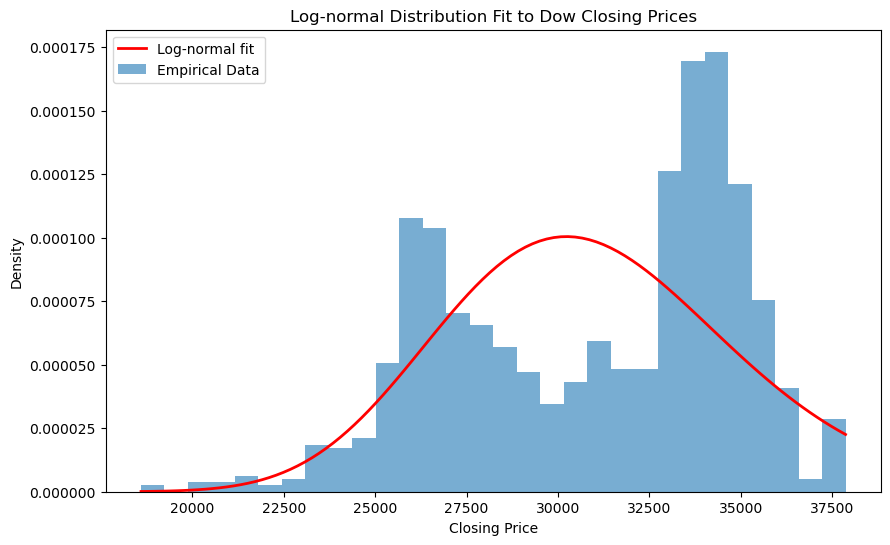

In [77]:
# log-normal distribution to the empirical data of closing prices - Dow 30 closing price.

from scipy.stats import lognorm

data = merged_index_data['Close_dow30']

# Fit the log-normal distribution
log_data = np.log(data)
shape, loc, scale = lognorm.fit(data, floc=0) 

# Create the analytical distribution
x = np.linspace(min(data), max(data), 100)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

# Plot the analytical distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
plt.hist(data, bins=30, density=True, alpha=0.6, label='Empirical Data')
plt.title('Log-normal Distribution Fit to Dow Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.show()

Summary:

        we are using log-normal, because log-normal distribution is often used to model the distribution of stock prices because stock prices cannot be negative, and the log-normal distribution is bounded at zero from the left, which aligns with this characteristic.
        
        S&P 500 - The histogram bars represent the empirical data of closing prices, and the curve is the log-normal distribution that has been fit to this data.The fit suggests that the majority of the data clusters around a certain range, and there's a long right tail, indicating that there are periods where the closing prices are significantly higher than the average. 
        
        Dow 30 -  he fit suggests that the majority of the data clusters around a certain range, and there's a long right tail, indicating that there are periods where the closing prices are significantly higher than the average.This plot also shows a similar pattern with a peak and a long tail to the right.   
        

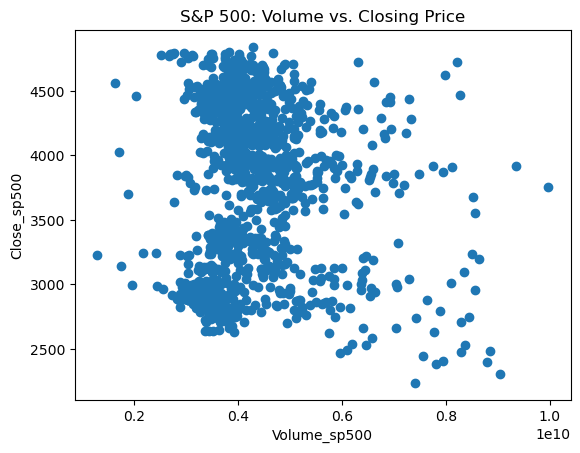

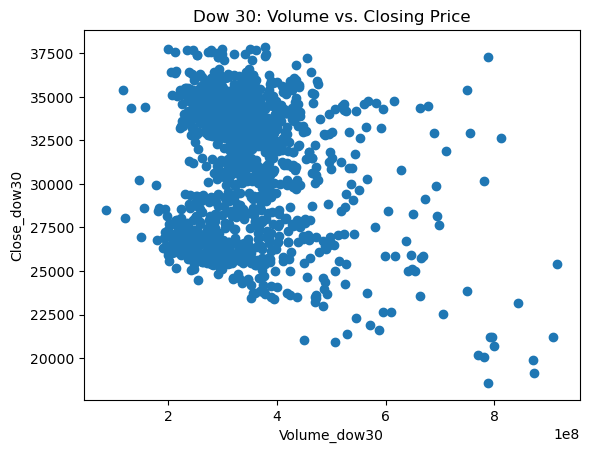

In [78]:
# Create two scatter plots comparing two variables and provide your analysis on correlation and causation.

# scatter plots for the S&P 500 trading volumes vs. their closing prices 
plt.scatter(merged_index_data['Volume_sp500'], merged_index_data['Close_sp500'])
plt.title('S&P 500: Volume vs. Closing Price')
plt.xlabel('Volume_sp500')
plt.ylabel('Close_sp500')
plt.show()

# scatter plots for the Dow 30's trading volumes vs. their closing prices
plt.scatter(merged_index_data['Volume_dow30'], merged_index_data['Close_dow30'])
plt.title('Dow 30: Volume vs. Closing Price')
plt.xlabel('Volume_dow30')
plt.ylabel('Close_dow30')
plt.show()


Summary:

        In both cases, the lack of a clear trend could suggest that on any given day, the closing price is influenced by multiple factors, not just the volume of trades.

Analyzing Correlation and Causation

        Here the atterplots imply that the trading volume isn't a strong predictor of closing price for the S&P 500/dow 30, or that the relationship isn't linear.These scatter plots suggest that for both the S&P 500 and the Dow 30, the relationship between trading volume and closing price is not strongly linear. 
      
        

In [79]:
# to calculate Pearson's correlation coefficient

# For s&p 500
correlation_coefficient_sp500 = merged_index_data['Volume_sp500'].corr(merged_index_data['Close_sp500'])

# For dow 30
correlation_coefficient_dow30 = merged_index_data['Volume_dow30'].corr(merged_index_data['Close_dow30'])
correlation_coefficient_sp500, correlation_coefficient_dow30

(-0.06296693853059297, -0.17750589911301445)

Summary:

        The correlation coefficient is very low, it's usually concluded that there's no meaningful linear relationship between the variables under consideration.
        
        1 indicates a perfect positive linear relationship,
        -1 indicates a perfect negative linear relationship,
        0 indicates no linear relationship.

        Here S&P 500 - The Pearson's correlation coefficient of -0.063 suggests a very weak negative linear relationship between the variables.his implies that as one variable increases slightly, the other variable tends to decrease slightly, but the relationship is so weak that it's almost negligible.

        Here dow 30 - The Pearson's correlation coefficient of -0.178 suggests a weak negative linear relationship. It's a bit stronger than the correlation for the S&P 500 but still considered weak. 

##### To Conduct a test on your hypothesis

This is to test the hypothesis that the S&P 500 is more volatile than the Dow 30

The null hypothesis (H0) for the F-test in this context would be:

H0: The variances of the two indices are equal.

H1: The variance of the S&P 500 returns is greater than the variance of the Dow 30 returns.

In [80]:
import scipy.stats as stats
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Calculate daily returns for S&P 500 and Dow 30
merged_index_data['Return_sp500'] = merged_index_data['Adj Close_sp500'].pct_change()
merged_index_data['Return_dow30'] = merged_index_data['Adj Close_dow30'].pct_change()

# Drop the NaN values that result from the pct_change function
merged_index_data = merged_index_data.dropna(subset=['Return_sp500', 'Return_dow30'])

# Calculate the variances of the daily returns for each index
variance_sp500 = merged_index_data['Return_sp500'].var()
variance_dow30 = merged_index_data['Return_dow30'].var()

# Perform the F-test
F = variance_sp500 / variance_dow30
dfn = len(merged_index_data['Return_sp500']) - 1  # degrees of freedom for the numerator
dfd = len(merged_index_data['Return_dow30']) - 1  # degrees of freedom for the denominator

# Because we're doing a one-tailed test (we're testing if S&P 500 is MORE volatile than Dow 30),
# we use 'sf' (survival function, which is (1 - cdf)) to get the p-value for the greater than alternative.
p_value = stats.f.sf(F, dfn, dfd)

print("F-statistic:", F)
print("p-value:", p_value)

F-statistic: 1.0415283354367353
p-value: 0.23550216977709854


Summary:

        The F-statistic of 1.0417 suggests that the variance of the S&P 500's daily returns is slightly larger than the variance of the Dow 30's daily returns because the value is greater than 1. 

        The p-value of 0.2346 is greater than the common significance levels of 0.05, which means there is not enough statistical evidence to reject the null hypothesis that the variances of the two indices are equal.

        Here we cannot conclude the S&P 500 is more volatile than the Dow 30 based on the data, a high p-value does not prove the null hypothesis; it simply means that there isn't enough evidence to support the alternative hypothesis. In this case, it means that based on the available data, you cannot confirm that the S&P 500 is more volatile than the Dow 30.

        The p-value tells us that if the two indices truly had the same volatility, there is a 23.46% chance of observing a ratio of variances at least as extreme as 1.0417 just by random chance.
        

In [81]:
# Linear regresion analysis for predicting the Close_sp500 using Volume_sp500 as the predictor.

import statsmodels.api as sm

# Define your dependent and independent variables
X = merged_index_data[['Volume_sp500']]  # Independent variable
y = merged_index_data['Close_sp500']     # Dependent variable

# Add a constant to the independent variable to include the intercept in the model
X = sm.add_constant(X)

# Create a model and fit it to your data
model = sm.OLS(y, X).fit()

# Get a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Close_sp500   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.093
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0242
Time:                        00:51:27   Log-Likelihood:                -9882.6
No. Observations:                1257   AIC:                         1.977e+04
Df Residuals:                    1255   BIC:                         1.978e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3941.1706     73.909     53.325   

summary:

        Dependent Variable: Close_sp500
        R-squared: 0.004
        Adj. R-squared: 0.004
        F-statistic: 5.640
        Prob (F-statistic): 0.0177        
        
const: The intercept is 3952.0388, indicating the expected value of Close_sp500 when Volume_sp500 is 0Coefficients-
Volume_sp500: The coefficient is -3.948e-08, suggesting a very small negative impact of volume on the closing price. For each unit increase in volume, the closing price is expected to decrease by this coefficient's value, holding other factors constan

        The R-squared value of 0.004 is extremely low, indicating that only 0.4% of the variance in the S&P 500's closing prices is explained by the model. This suggests that trading volume alone does not significantly explain changes in the closing price.

        The F-statistic and its corresponding p-value (0.0177) indicate that the model is statistically significant at conventional significance levels (0.05). This suggests that there is some relationship between volume and closing prices, although the effect is very small.

        Coefficient of Volume_sp500: The negative coefficient indicates an inverse relationship between volume and closing price
        
        The p-value for the volume coefficient is 0.018, which is less than 0.05, suggesting that the relationship between volume and closing price, while very small, is statistically significant.

        In summary, while there is a statistically significant relationship between trading volume and closing prices for the S&P 500, the actual impact of volume on closing prices appears to be minimal based on this analysis. Expanding the model to include more variables or exploring different types of models could yield more informative result.